In [1]:
import os
import zipfile
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import pandas as pd
import os

zip_file_path = r"C:\Users\91630\Downloads\mnist.zip"
output_dir_path = r"C:\Users\91630\Downloads\mnist_extracted"

def unzip(zip_file_path, output_dir_path):
    """
    Unzips the specified zip file into the specified directory.

    Parameters:
    zip_file_path (str): The path to the zip file.
    output_dir_path (str): The directory where the contents will be extracted.
    """
    print(f"Unzipping {zip_file_path} to {output_dir_path}...")
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(output_dir_path)
    print("Data uncompressed successfully...")

def read_image_files(output_dir_path):
    """
    Reads all image files from the specified directory using os.walk and returns
    a list of dictionaries. Each dictionary contains the file name and its path.

    Parameters:
    output_dir_path (str): The directory to search for image files.

    Returns:
    list: A list of dictionaries with file name and path.
    """
    files_data = []
    print(f"Searching for image files in {output_dir_path}...")
    for root, dirs, files in os.walk(output_dir_path):
        print(f"Reading image files from {root}... Detected {len(files)} files in {root} directory.")
        for file_name in files:
            if file_name.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".bmp")):
                file_path = os.path.join(root, file_name)
                print(f"Processing file: {file_path}")
                files_data.append({"file_name": file_name, "file_path": file_path})
    if not files_data:
        print("No image files found.")
    return files_data

def load_into_df(files_data):
    """
    Loads the list of dictionaries into a pandas DataFrame.

    Parameters:
    files_data (list): The list of dictionaries to load into the DataFrame.

    Returns:
    DataFrame: The resulting pandas DataFrame.
    """
    if files_data:
        df = pd.DataFrame(files_data)
        print("DataFrame created successfully.")
    else:
        df = pd.DataFrame()
        print("No image files found, empty DataFrame created.")
    return df

unzip(zip_file_path, output_dir_path)
files_data = read_image_files(output_dir_path)
print(f"Total image files processed: {len(files_data)}")
df = load_into_df(files_data)
print(df)

Unzipping C:\Users\91630\Downloads\mnist.zip to C:\Users\91630\Downloads\mnist_extracted...


In [2]:
path = r"C:\Users\91630\Downloads\mnist_extracted\New folder"

In [3]:
def vectorize_image_files(path):
    image_vectors = []
    image_labels = []
    # Get the list of folder names (labels)
    labels = [dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path, dir_name))]
    for label in labels:
        label_dir = os.path.join(path, label)
        # Ensure the directory exists
        if os.path.isdir(label_dir):
            # Iterate through each image in the directory
            for image_file in os.listdir(label_dir):
                image_file_path = os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    #### Vectorize ####
                    img_arr = np.array(img)
                    image_vector = img_arr.ravel()
                    ###################
                    image_vectors.append(image_vector)
                    image_labels.append(label)
    return image_vectors, image_labels


def load_vectors_into_df(image_vectors, image_labels):
    df = pd.DataFrame(image_vectors, columns=[f"pixel_{i}" for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df

In [4]:
image_vectors, image_labels = vectorize_image_files(path)


image_df = load_vectors_into_df(image_vectors, image_labels)

image_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


<Axes: xlabel='labels', ylabel='count'>

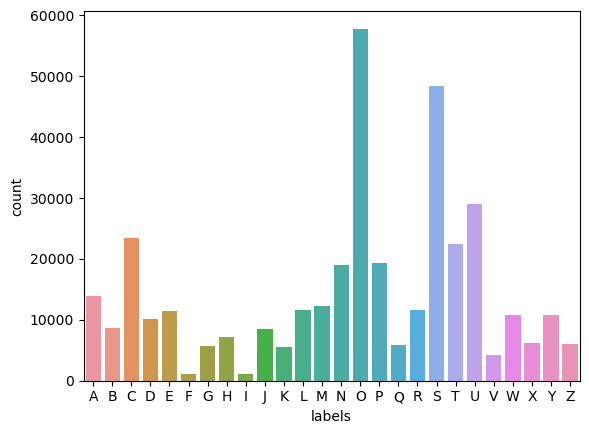

In [5]:
sns.countplot(data = image_df,x = image_df['labels'])

Randomly Generated index: 162148
Label of image at 162148 index: O

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 121 193 193 64 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 57 193 255 255 255 219 15 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 147 234 255 255 255 255 255 93 106 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 206 255 255 255 255 255 255 162 129 245 21 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 18 90 255 255 255 255 255 245 175 124 82 185 255
  152 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 183 255 255 255 255 219 116 54 0 0 10 201 255 178 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 203 255 255 255 255 198 21 0 0 0 0 137 255 255 100 0
  0 0 0]
 [0 0 0 0 0 0 0 0 155 255 255 255 255 100 13 0 0 0 0 21 245 255 214 13 0
  0 0 0]
 [0 0 0 0 0 0 0 157

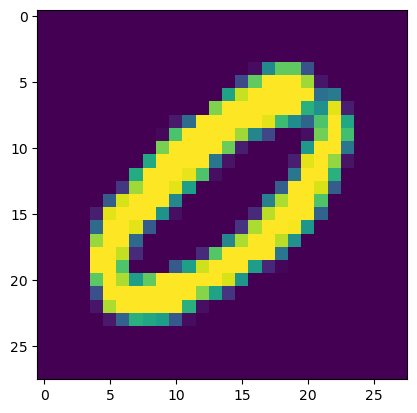

In [6]:
idx = np.random.randint(0, 372451)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (28,28))
print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

## Segregate I/O

In [7]:
X = image_df.drop(columns="labels")

In [8]:
y = image_df[['labels']]

## Splitting Train and Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [11]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(260715, 784) (111736, 784)
(260715, 1) (111736, 1)


## Data Preparation on Train & Test data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scalar = MinMaxScaler()

In [16]:
X_train_transformed = pd.DataFrame(scalar.fit_transform(X_train),
                                  columns=scalar.get_feature_names_out(),
                                  index = X_train.index)

In [17]:
X_train_transformed.shape

(260715, 784)

In [18]:
X_test_transformed = pd.DataFrame(scalar.transform(X_test),
                                 columns=scalar.get_feature_names_out(),
                                 index = X_test.index)

In [19]:
X_test_transformed.shape

(111736, 784)

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier()

In [22]:
tree.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = tree.predict(X_test_transformed)

In [24]:
from sklearn import metrics

In [26]:
d = metrics.accuracy_score(y_pred,y_test)
d

0.9396702942650533

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
forest = RandomForestClassifier()

In [29]:
forest.fit(X_train_transformed,y_train)

C:\Users\91630\AppData\Local\Temp\ipykernel_24184\2486142275.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_transformed,y_train)


RandomForestClassifier()

In [30]:
y_pred1 = forest.predict(X_test_transformed)

In [31]:
r = metrics.accuracy_score(y_pred1,y_test)
r

0.9836579079258252

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic = LogisticRegression()

In [34]:
logistic.fit(X_train_transformed,y_train)

C:\Users\91630\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91630\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred2 = logistic.predict(X_test_transformed)

In [36]:
l = metrics.accuracy_score(y_pred2,y_test)
l

0.879161595188659

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train_transformed,y_train)

C:\Users\91630\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
y_pred3 = knn.predict(X_test_transformed)

In [42]:
k = metrics.accuracy_score(y_pred3,y_test)
k

0.9569521013818286

In [43]:
d = 0.9396702942650533
r = 0.9836579079258252
l = 0.879161595188659
k = 0.9569521013818286

In [44]:
algorithms = ["Decision Tree","Random Forest","Logistic Regression","KNN"]

In [45]:
accuracy_score = [d,r,l,k]

<Axes: >

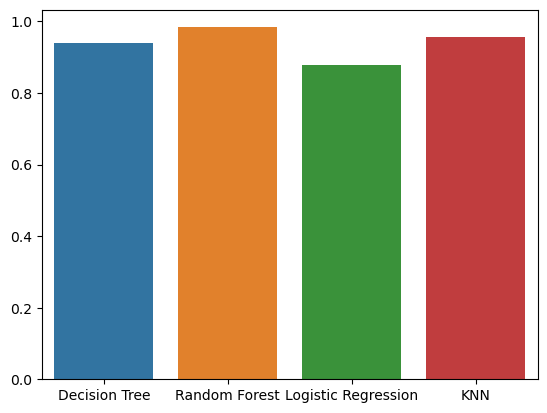

In [46]:
sns.barplot(x = algorithms,y=accuracy_score,palette="tab10")